<h1>Question 6: Naive Bayes</h1>

In [1]:
%run Common.ipynb

%matplotlib inline
        
def fit_predict_and_plot(clf, train_data, train_labels, test_data, test_labels, class_names):
    clf.fit(train_data, train_labels)

    prob = clf.predict_proba(test_data)
    pred = clf.predict(test_data)

    fpr, tpr, _ = roc_curve(test_labels, prob[:,1])

    plot_roc(fpr, tpr)
    
    cnf_matrix = confusion_matrix(test_labels, pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    
    print_scores(test_labels, pred)
    
    return clf

<h3>Load binary-classified dataset and reduced dataset from Question 3</h3>

In [2]:
import pickle

with open('train_lemmatized_2.pickle', 'rb') as handle:
    train_ds = pickle.load(handle)
    
with open('test_lemmatized_2.pickle', 'rb') as handle:
    test_ds = pickle.load(handle)
    
with open('train_lsi.pickle', 'rb') as handle:
    train_lsi = pickle.load(handle)
    
with open('test_lsi.pickle', 'rb') as handle:
    test_lsi = pickle.load(handle)

<h2>Gaussian Naive Bayes</h2>

Confusion matrix, without normalization
[[1383  177]
 [ 116 1474]]
Normalized confusion matrix
[[ 0.89  0.11]
 [ 0.07  0.93]]
accuracy:0.906984126984127
precision:0.8927922471229558
recall:0.9270440251572327
f1:0.9095958037642702


GaussianNB(priors=None)

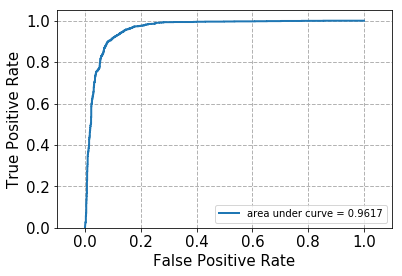

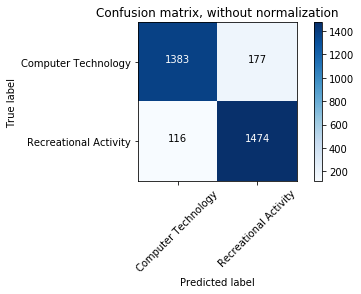

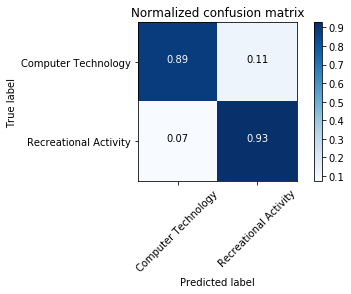

In [3]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
fit_predict_and_plot(clf, train_lsi, train_ds.target, test_lsi, test_ds.target, train_ds.target_names)